In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#switch the years to analyze different years

data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [4]:

import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = 'c:/Users/estifo/Downloads/gamma-capture-project/data/'

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2000, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())


                 0       1       2       3       4  5
0  20000530 172700  0.9302  0.9302  0.9302  0.9302  0
1  20000530 173500  0.9304  0.9305  0.9304  0.9305  0
2  20000530 173800  0.9304  0.9304  0.9303  0.9303  0
3  20000530 174300  0.9301  0.9301  0.9300  0.9300  0
4  20000530 174400  0.9298  0.9298  0.9297  0.9297  0


In [5]:
data.tail()

,0,1,2,3,4,5
7280970,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [6]:
data.shape

(7280975, 6)

In [7]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [9]:
data.iloc[:10]

,DateTime,Open,High,Low,Close,Volume
0,20000530 172700,0.9302,0.9302,0.9302,0.9302,0
1,20000530 173500,0.9304,0.9305,0.9304,0.9305,0
2,20000530 173800,0.9304,0.9304,0.9303,0.9303,0
3,20000530 174300,0.9301,0.9301,0.9300,0.9300,0
4,20000530 174400,0.9298,0.9298,0.9297,0.9297,0
5,20000530 182900,0.9298,0.9299,0.9298,0.9299,0
6,20000530 183700,0.9300,0.9300,0.9300,0.9300,0
7,20000530 184000,0.9299,0.9299,0.9299,0.9299,0
8,20000530 184100,0.9300,0.9300,0.9300,0.9300,0
9,20000530 184200,0.9299,0.9299,0.9298,0.9299,0


In [10]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [11]:
# Identify duplicate rows based on the 'DateTime' column
duplicates = data[data.duplicated(subset=['DateTime'], keep=False)]

# Get the indices of duplicate rows
duplicate_indices = duplicates.index.tolist()
print("Indices of Duplicate Rows (Based on DateTime Column):")
print(duplicate_indices)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
Indices of Duplicate Rows (Based on DateTime Column):
[6472566, 6472567, 6472568, 6472569, 6472570, 6472571, 6472572, 6472573, 6472574, 6472575, 6472576, 6472577, 6472578, 6472579, 6472580, 6472581, 6472582, 6472583, 6472584, 6472585, 6472586, 6472587, 6472588, 6472589, 6472590, 6472591, 6472592, 6472593, 6472594, 6472595, 6472596, 6472597, 6472598, 6472599, 6472600, 6472601, 6472602, 6472603, 6472604, 6472605, 6472606, 6472607, 6472608, 6472609, 6472610, 6472611, 6472612, 6472613, 6472614, 6472615, 6472616, 6472617, 6472618, 6472619, 6472620, 6472621, 6472622, 6472623, 6472624, 6472625, 6472626, 6472627, 6472628, 6472629, 6472630, 6472631, 6472632, 6472633, 6472634, 6472635, 6472636, 6472637, 6472638, 6472639, 6472640, 6472641, 6472642, 6472643, 6472644, 6472645, 6472646, 6472647, 6472648, 6472649, 6472650, 6472651, 6472652, 6472653, 6472654, 6472655,

In [12]:
# Could not see any duplicated row
data.iloc[308461:308480]

,DateTime,Open,High,Low,Close,Volume
308461,2001-08-20 09:09:00,0.9154,0.9157,0.9152,0.9154,0
308462,2001-08-20 09:10:00,0.9153,0.9153,0.9152,0.9153,0
308463,2001-08-20 09:11:00,0.9154,0.9156,0.9154,0.9156,0
308464,2001-08-20 09:12:00,0.9155,0.9156,0.9154,0.9156,0
308465,2001-08-20 09:13:00,0.9155,0.9155,0.9154,0.9154,0
308466,2001-08-20 09:14:00,0.9153,0.9155,0.9153,0.9155,0
308467,2001-08-20 09:15:00,0.9154,0.9154,0.9154,0.9154,0
308468,2001-08-20 09:16:00,0.9155,0.9155,0.9155,0.9155,0
308469,2001-08-20 09:17:00,0.9154,0.9155,0.9154,0.9155,0
308470,2001-08-20 09:18:00,0.9154,0.9155,0.9154,0.9155,0


In [13]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
7280970,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
7280971,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
7280972,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0
7280973,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0
7280974,2021-12-31 16:58:00,1.13740,1.13740,1.13681,1.13686,0


In [14]:
data.shape

(7280975, 6)

In [15]:
data.set_index('DateTime', inplace=True)

In [16]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0
2000-05-30 17:35:00,0.93040,0.93050,0.93040,0.93050,0
2000-05-30 17:38:00,0.93040,0.93040,0.93030,0.93030,0
2000-05-30 17:43:00,0.93010,0.93010,0.93000,0.93000,0
2000-05-30 17:44:00,0.92980,0.92980,0.92970,0.92970,0
...,...,...,...,...,...
2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0


In [17]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


C:\Users\estifo\AppData\Local\Temp\ipykernel_13704\14682924.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [18]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2000-05-30 17:28:00', '2000-05-30 17:29:00',
               '2000-05-30 17:30:00', '2000-05-30 17:31:00',
               '2000-05-30 17:32:00', '2000-05-30 17:33:00',
               '2000-05-30 17:34:00', '2000-05-30 17:36:00',
               '2000-05-30 17:37:00', '2000-05-30 17:39:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=4073577, freq=None)


In [19]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:32:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:33:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:34:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:35:00,0.9295,0.9295,0.9295,0.9295,0
2000-05-30 19:36:00,0.9294,0.9294,0.9293,0.9294,0
2000-05-30 19:37:00,0.9293,0.9294,0.9293,0.9293,0
2000-05-30 19:39:00,0.9294,0.9294,0.9294,0.9294,0
2000-05-30 19:42:00,0.9295,0.9295,0.9294,0.9294,0
2000-05-30 19:44:00,0.9295,0.9295,0.9295,0.9295,0


In [20]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:56:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:57:00,0.9296,0.9296,0.9295,0.9295,0
2000-05-30 19:58:00,0.9297,0.9299,0.9297,0.9298,0
2000-05-30 19:59:00,0.9299,0.9305,0.9299,0.9305,0
2000-05-30 20:00:00,0.9306,0.9307,0.9306,0.9307,0
2000-05-30 20:01:00,0.9308,0.9308,0.9307,0.9308,0
2000-05-30 20:03:00,0.9307,0.9309,0.9307,0.9309,0
2000-05-30 20:05:00,0.9310,0.9311,0.9310,0.9311,0
2000-05-30 20:06:00,0.9312,0.9312,0.9311,0.9311,0


In [21]:
missing_timestamps.shape

(4073577,)

In [22]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [23]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2000-05-30 17:28:00,1
1,2000-05-30 17:29:00,1
2,2000-05-30 17:30:00,1
3,2000-05-30 17:31:00,1
4,2000-05-30 17:32:00,1
...,...,...
4073572,2021-12-31 01:58:00,1
4073573,2021-12-31 02:17:00,1
4073574,2021-12-31 13:43:00,1
4073575,2021-12-31 14:07:00,1


In [24]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_13704\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [25]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [26]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [27]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,NaN
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [28]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [29]:
combined_df.shape

(11354552, 7)

In [30]:
combined_df.iloc[35:45]

,DateTime,Open,High,Low,Close,Volume,indicator
35,2000-05-30 18:02:00,NaN,NaN,NaN,NaN,NaN,1
36,2000-05-30 18:03:00,NaN,NaN,NaN,NaN,NaN,1
37,2000-05-30 18:04:00,NaN,NaN,NaN,NaN,NaN,1
38,2000-05-30 18:05:00,NaN,NaN,NaN,NaN,NaN,1
39,2000-05-30 18:06:00,NaN,NaN,NaN,NaN,NaN,1
40,2000-05-30 18:07:00,NaN,NaN,NaN,NaN,NaN,1
41,2000-05-30 18:08:00,NaN,NaN,NaN,NaN,NaN,1
42,2000-05-30 18:09:00,NaN,NaN,NaN,NaN,NaN,1
43,2000-05-30 18:10:00,NaN,NaN,NaN,NaN,NaN,1
44,2000-05-30 18:11:00,NaN,NaN,NaN,NaN,NaN,1


In [31]:
combined_df.iloc[50:60]

,DateTime,Open,High,Low,Close,Volume,indicator
50,2000-05-30 18:17:00,NaN,NaN,NaN,NaN,NaN,1
51,2000-05-30 18:18:00,NaN,NaN,NaN,NaN,NaN,1
52,2000-05-30 18:19:00,NaN,NaN,NaN,NaN,NaN,1
53,2000-05-30 18:20:00,NaN,NaN,NaN,NaN,NaN,1
54,2000-05-30 18:21:00,NaN,NaN,NaN,NaN,NaN,1
55,2000-05-30 18:22:00,NaN,NaN,NaN,NaN,NaN,1
56,2000-05-30 18:23:00,NaN,NaN,NaN,NaN,NaN,1
57,2000-05-30 18:24:00,NaN,NaN,NaN,NaN,NaN,1
58,2000-05-30 18:25:00,NaN,NaN,NaN,NaN,NaN,1
59,2000-05-30 18:26:00,NaN,NaN,NaN,NaN,NaN,1


In [32]:
sample = combined_df.iloc[:75]

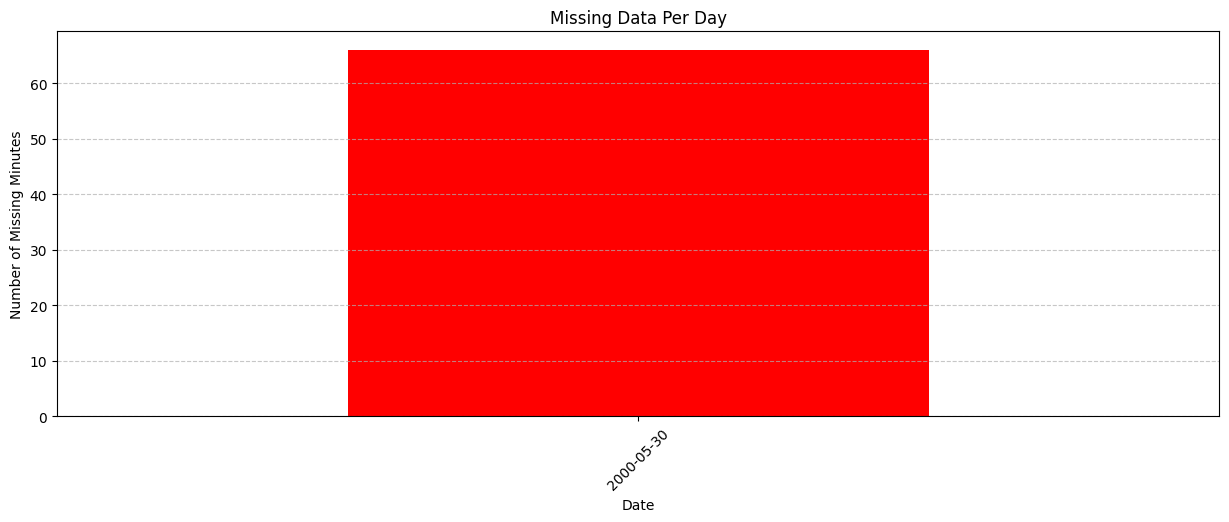

In [33]:
# Group by date and sum the indicator column (missing minutes per day)
missing_per_day = sample.groupby(sample['DateTime'].dt.date)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color='red')
plt.title('Missing Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
'''
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()


# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(32, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# Plot Step 3: Data points in weekdays
plt.figure(figsize=(22, 5))
weekday_missing_data = pd.Series(missing_per_day[weekdays], index=weekdays) 
weekday_missing_data.plot(kind='bar', color=['blue'])
plt.title('Missing Data per day in Weekdays')
plt.xlabel('DateTime')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(22, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''


"\n# Ensure DateTime is in datetime format\ncombined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])\n\n# Step 1: Group by date and sum the indicator column (missing minutes per day)\nmissing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()\n\n# Step 2: Identify weekdays (days with less than 400 missing data)\nweekdays = missing_per_day[missing_per_day < 400].index\n\n# Step 3: Filter the dataframe to include only weekdays\nweekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]\n\n# Step 4: Group by hour and sum missing data\nmissing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()\n\n\n# Plot Step 2: Highlighting weekdays (days with missing data < 400)\nplt.figure(figsize=(32, 5))\nmissing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])\nplt.title('Weekdays vs Non-Weekdays Based on Missing Data')\nplt.xlabel('Date')\nplt.ylabel(

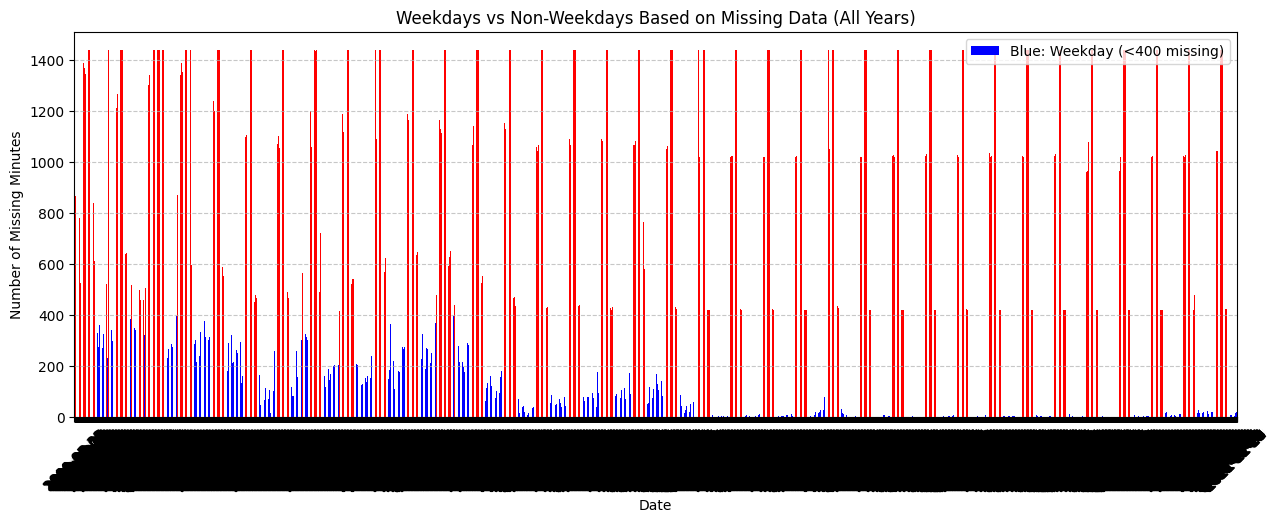

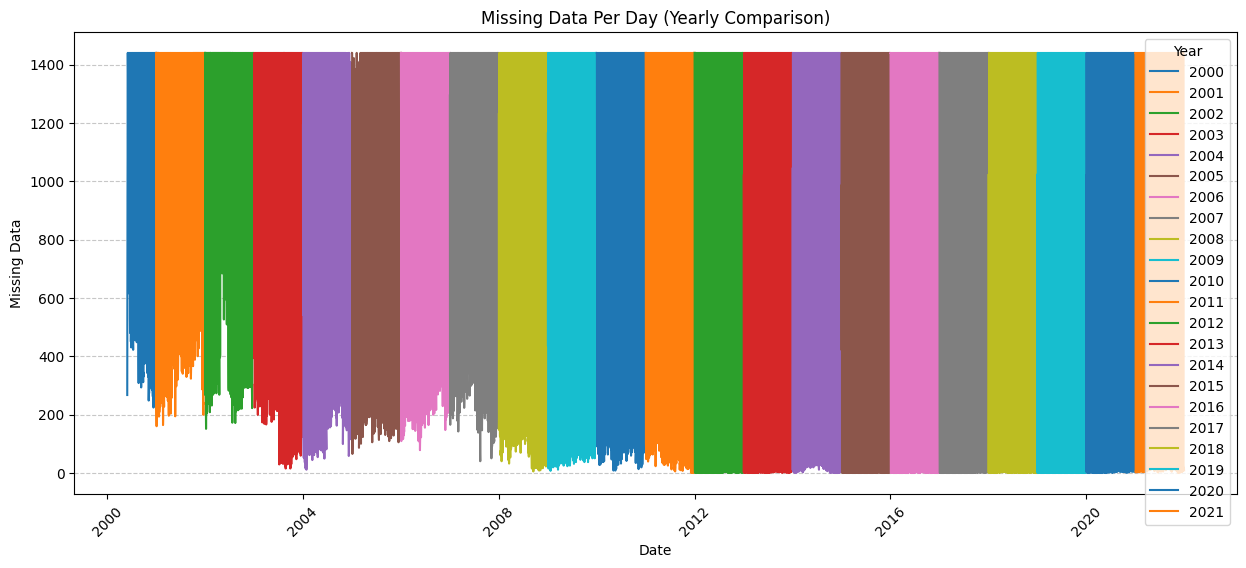

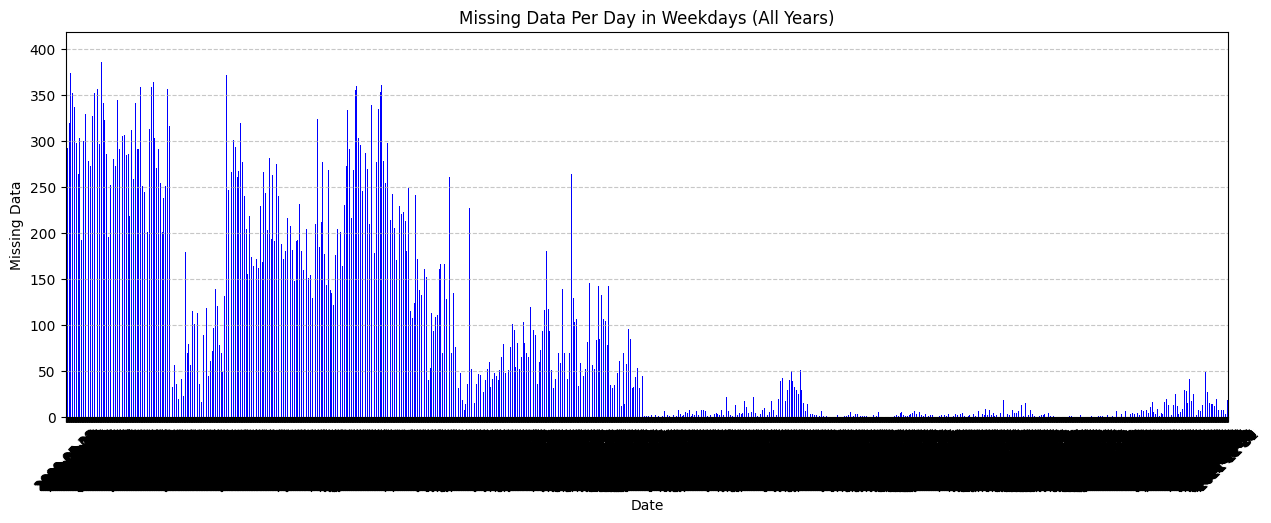

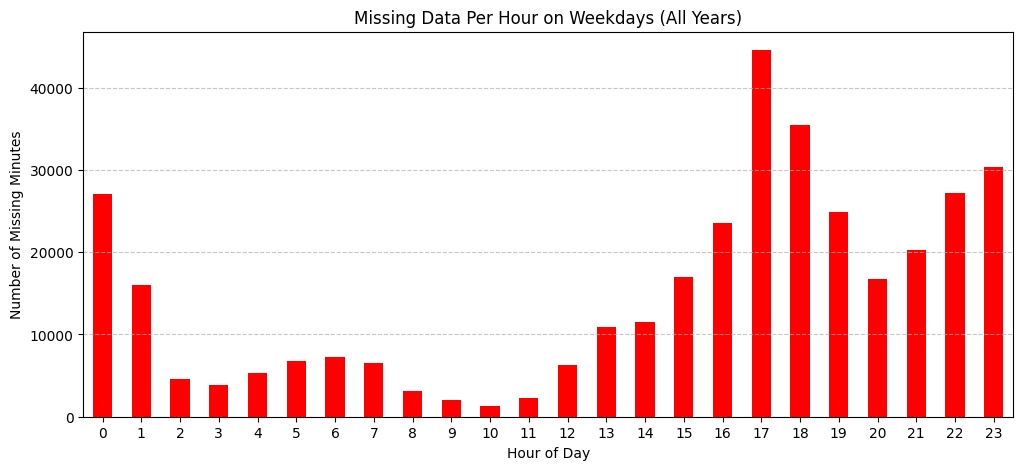

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# OPTIONAL: Yearly Breakdown (Missing Data Per Day)
plt.figure(figsize=(15, 6))
for year in sorted(combined_df['DateTime'].dt.year.unique()):
    missing_per_day_yearly.loc[year].plot(label=str(year))
plt.title('Missing Data Per Day (Yearly Comparison)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 3: Missing data per weekday across multiple years
plt.figure(figsize=(15, 5))
weekday_missing_data = missing_per_day[weekdays]
weekday_missing_data.plot(kind='bar', color='blue')
plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [36]:
missing_per_day

DateTime
2000-05-30     267
2000-05-31     822
2000-06-01     944
2000-06-02    1077
2000-06-03    1440
              ... 
2021-12-27      30
2021-12-28      15
2021-12-29      18
2021-12-30      17
2021-12-31       9
Name: indicator, Length: 7886, dtype: int64

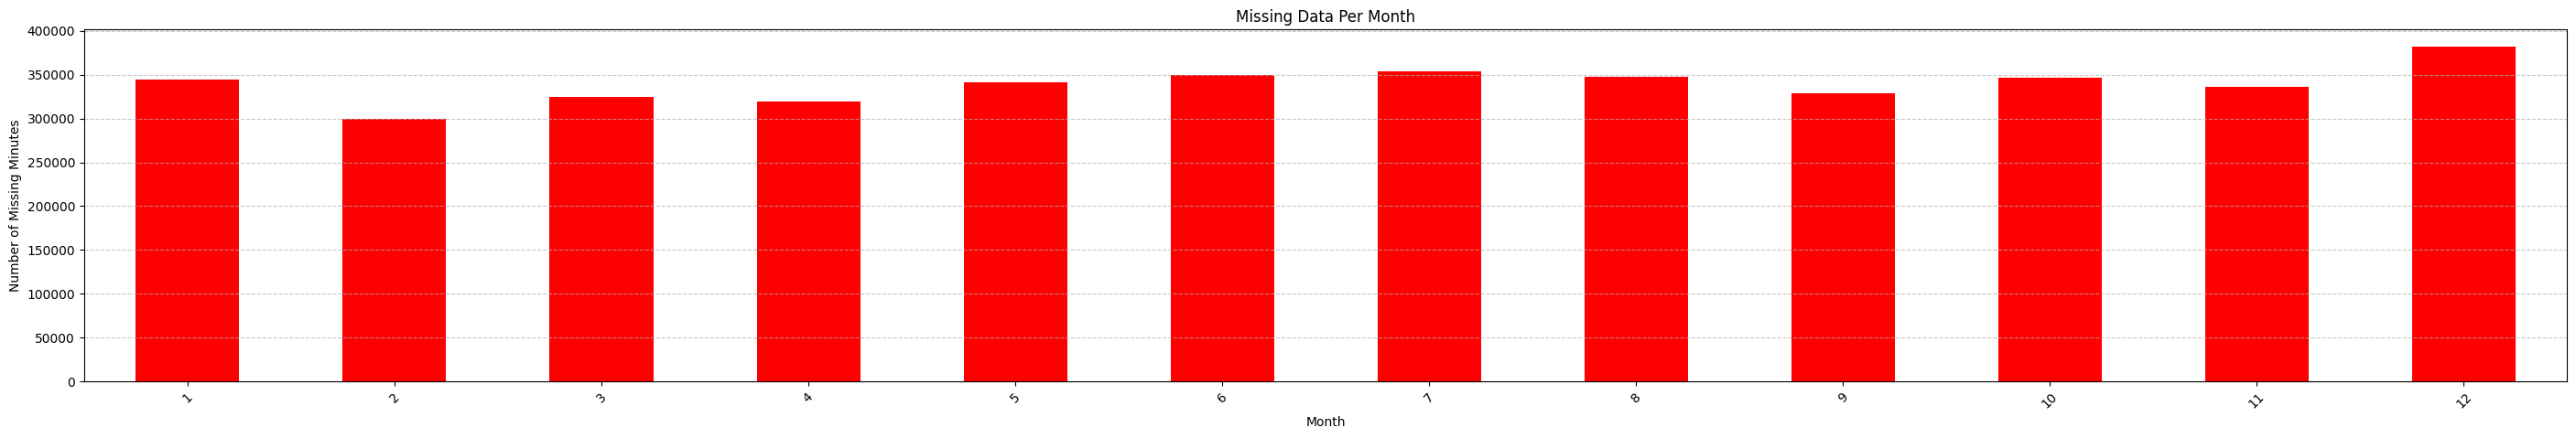

In [37]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [39]:
print(missing_per_month)

DateTime
1     344618
2     299442
3     324297
4     319527
5     340878
6     349312
7     353369
8     347280
9     329058
10    346928
11    336473
12    382395
Name: indicator, dtype: int64


In [40]:
sum(missing_per_month)-(11520*12)

3935337

In [41]:
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_df= combined_df[dup_consecutive]
dup_df
# Tanyar screenshot
#dup_df.loc[pd.to_datetime('2023-01-03 17:03:00'):pd.to_datetime('2023-01-03 17:48:00'), :]

,DateTime,Open,High,Low,Close,Volume,indicator
110,2000-05-30 19:17:00,0.92980,0.92990,0.92980,0.92990,0.0,0
111,2000-05-30 19:18:00,0.92980,0.92990,0.92980,0.92990,0.0,0
443,2000-05-31 00:50:00,0.93150,0.93150,0.93150,0.93150,0.0,0
444,2000-05-31 00:51:00,0.93150,0.93150,0.93150,0.93150,0.0,0
1077,2000-05-31 11:24:00,0.93100,0.93110,0.93100,0.93100,0.0,0
...,...,...,...,...,...,...,...
11353333,2021-12-30 20:40:00,1.13238,1.13238,1.13237,1.13237,0.0,0
11353374,2021-12-30 21:21:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11353375,2021-12-30 21:22:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11354392,2021-12-31 14:19:00,1.13847,1.13851,1.13847,1.13851,0.0,0


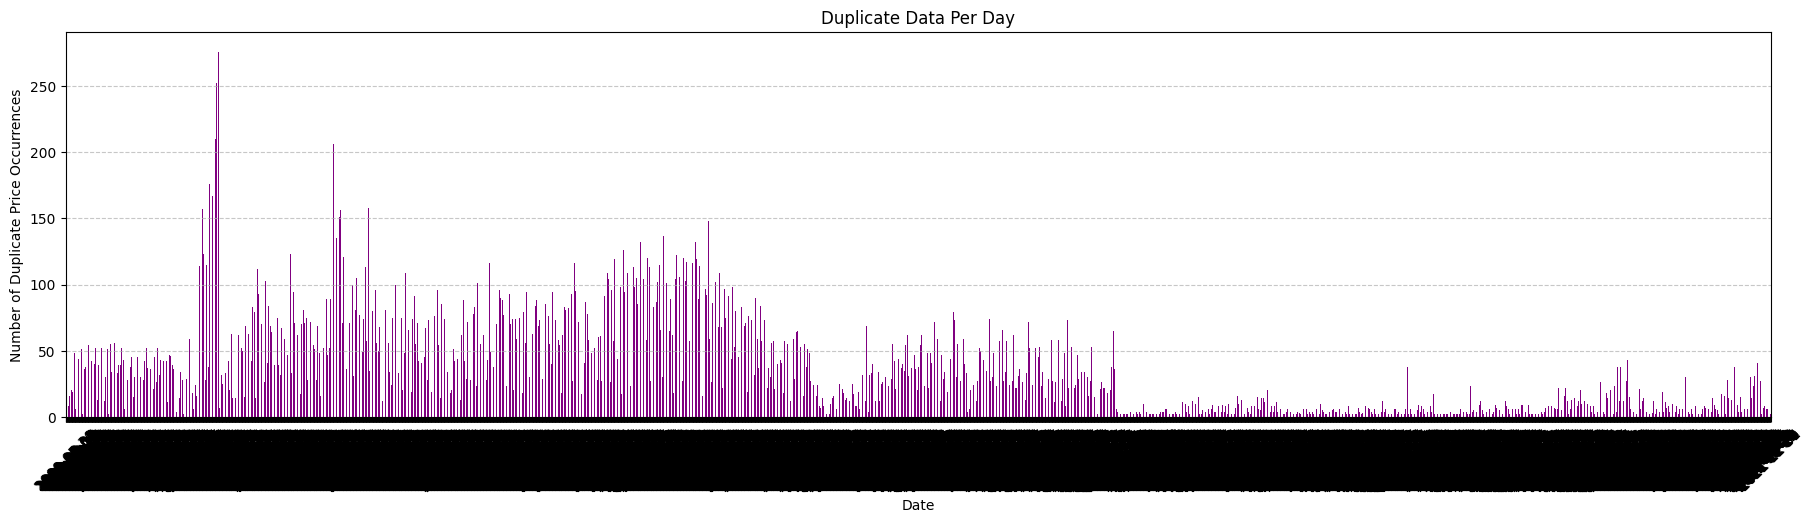

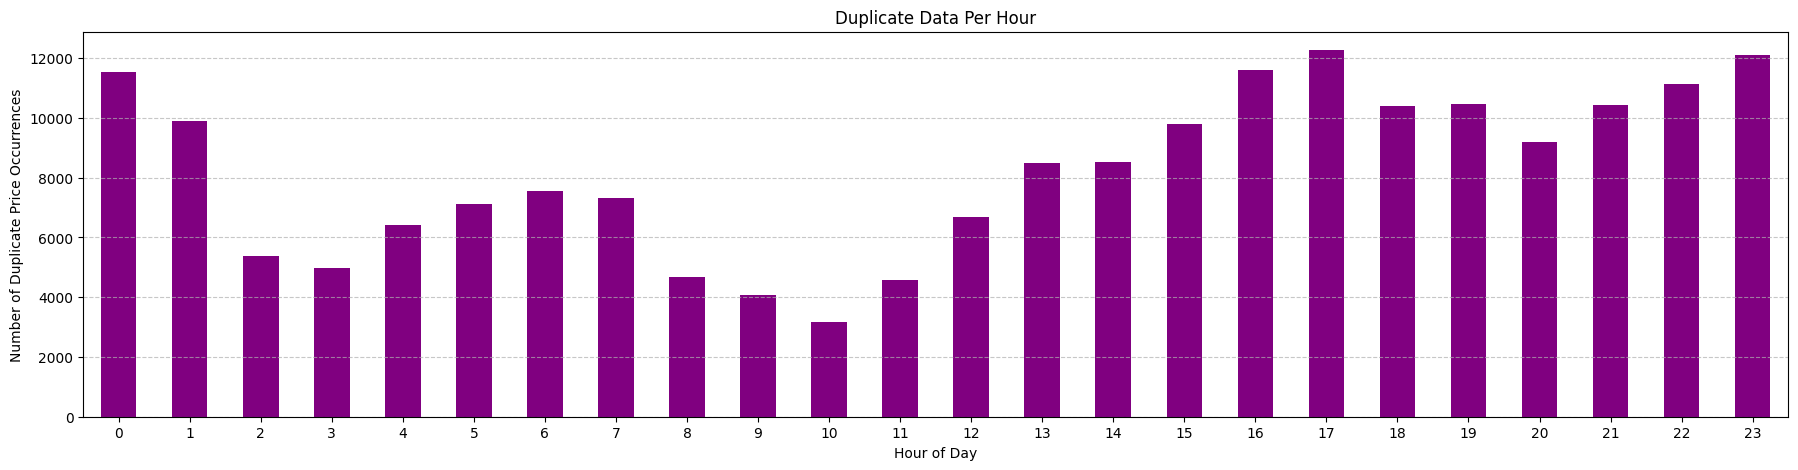

In [42]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [43]:
60*5*4*12*20   # if we assume we have an entire hour of duplicates over 20 years

288000

In [44]:
# Remove weekend data (Saturday = 5, Sunday = 6)
combined_weekend_df = combined_df[combined_df['DateTime'].dt.weekday < 5]
combined_weekend_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [45]:
# Remove duplicated OHLC data
combined_df_clean = combined_weekend_df[~dup_consecutive]
combined_df_clean

C:\Users\estifo\AppData\Local\Temp\ipykernel_13704\2055765388.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df_clean = combined_weekend_df[~dup_consecutive]


,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [46]:
combined_df_clean[combined_df_clean['indicator'] == 1]

,DateTime,Open,High,Low,Close,Volume,indicator
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
5,2000-05-30 17:32:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11353651,2021-12-31 01:58:00,NaN,NaN,NaN,NaN,NaN,1
11353670,2021-12-31 02:17:00,NaN,NaN,NaN,NaN,NaN,1
11354356,2021-12-31 13:43:00,NaN,NaN,NaN,NaN,NaN,1
11354380,2021-12-31 14:07:00,NaN,NaN,NaN,NaN,NaN,1


In [47]:
combined_df_clean.isna().sum()

DateTime           0
Open         1219464
High         1219464
Low          1219464
Close        1219464
Volume       1219464
indicator          0
dtype: int64

In [48]:
dup_check = combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = combined_df_clean[dup_check]
dup_check_df.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator
28132,2000-06-19 06:19:00,0.9646,0.9646,0.9646,0.9646,0.0,0
28135,2000-06-19 06:22:00,0.9646,0.9646,0.9646,0.9646,0.0,0
28214,2000-06-19 07:41:00,0.9637,0.9639,0.9637,0.9638,0.0,0
28217,2000-06-19 07:44:00,0.9637,0.9639,0.9637,0.9638,0.0,0
29004,2000-06-19 20:51:00,0.9579,0.9579,0.9579,0.9579,0.0,0
29007,2000-06-19 20:54:00,0.9579,0.9579,0.9579,0.9579,0.0,0
38283,2000-06-26 07:30:00,0.9317,0.9319,0.9317,0.9318,0.0,0
38286,2000-06-26 07:33:00,0.9317,0.9319,0.9317,0.9318,0.0,0
59791,2000-07-11 05:58:00,0.9548,0.9548,0.9547,0.9547,0.0,0
59795,2000-07-11 06:02:00,0.9548,0.9548,0.9547,0.9547,0.0,0


In [49]:
# Step 2: Extract only the duplicate rows for review
dup_check_df = combined_df_clean[dup_check]
dup_check_df

,DateTime,Open,High,Low,Close,Volume,indicator
28132,2000-06-19 06:19:00,0.96460,0.96460,0.96460,0.96460,0.0,0
28135,2000-06-19 06:22:00,0.96460,0.96460,0.96460,0.96460,0.0,0
28214,2000-06-19 07:41:00,0.96370,0.96390,0.96370,0.96380,0.0,0
28217,2000-06-19 07:44:00,0.96370,0.96390,0.96370,0.96380,0.0,0
29004,2000-06-19 20:51:00,0.95790,0.95790,0.95790,0.95790,0.0,0
...,...,...,...,...,...,...,...
11257990,2021-10-25 16:37:00,1.16107,1.16107,1.16107,1.16107,0.0,0
11299869,2021-11-23 17:36:00,1.12480,1.12482,1.12480,1.12480,0.0,0
11299873,2021-11-23 17:40:00,1.12480,1.12482,1.12480,1.12480,0.0,0
11348831,2021-12-27 17:38:00,1.13255,1.13255,1.13255,1.13255,0.0,0


In [50]:
# Step 3: Remove the left over duplicate OHLC rows 
final_data = combined_df_clean[~dup_check]
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [51]:
dup_check = final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = final_data[dup_check]
dup_check_df.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator
38282,2000-06-26 07:29:00,0.9317,0.9318,0.9317,0.9318,0.0,0
38287,2000-06-26 07:34:00,0.9317,0.9318,0.9317,0.9318,0.0,0
194879,2000-10-13 01:26:00,0.8634,0.8634,0.8634,0.8634,0.0,0
194884,2000-10-13 01:31:00,0.8634,0.8634,0.8634,0.8634,0.0,0
848019,2002-01-09 15:06:00,0.8908,0.8908,0.8907,0.8907,0.0,0
848024,2002-01-09 15:11:00,0.8908,0.8908,0.8907,0.8907,0.0,0
885714,2002-02-04 19:21:00,0.8693,0.8694,0.8692,0.8694,0.0,0
885722,2002-02-04 19:29:00,0.8693,0.8694,0.8692,0.8694,0.0,0
958985,2002-03-27 16:32:00,0.8730,0.8730,0.8729,0.8729,0.0,0
958991,2002-03-27 16:38:00,0.8730,0.8730,0.8729,0.8729,0.0,0


In [52]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [53]:
#1
# Rename columns for clarity
data.columns = ['Raw_DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

# Split the Raw_DateTime column into Date and Time
data[['Date', 'Time']] = data['Raw_DateTime'].str.split(' ', expand=True)
data = data.drop(columns=['Raw_DateTime'])

# Combine Date and Time into a proper Datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y%m%d %H%M%S')
data = data.drop(columns=['Date', 'Time'])

# Sort by the Datetime column
data = data.sort_values(by='Datetime').reset_index(drop=True)

# Create a complete 1-minute time range
time_range = pd.date_range(start=data['Datetime'].min(), end=data['Datetime'].max(), freq='1T')

data.tail(20)


ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [ ]:
# Find and display duplicate 'Datetime' values
duplicate_datetimes = data[data['Datetime'].duplicated(keep=False)]['Datetime']

print("Duplicate Datetime values:")
print(duplicate_datetimes)

# Optionally, you can also display the entire rows with duplicate 'Datetime' values:
print("\nRows with duplicate Datetime values:")
print(duplicate_datetimes)

In [ ]:
data.iloc[25927:25930]

In [ ]:
#####   review

#2
# Drop duplicates in 'Datetime' before setting it as the index
data = data.drop_duplicates(subset=['Datetime'])
# Reindex the dataset to match the complete time range
data = data.set_index('Datetime').reindex(time_range).reset_index()
data = data.rename(columns={'index': 'Datetime'})

# Handle missing values (choose one strategy)
# Forward fill missing values
data.fillna(method='ffill', inplace=True)

# Backward fill missing values
# data.fillna(method='bfill', inplace=True)

# Display the first few rows of the cleaned dataset
data.tail(20)

In [ ]:
import matplotlib.pyplot as plt

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['Datetime']).dt.floor('h').dt.hour
data

In [ ]:
#######################################
########    CLOSE-CLOSE RVOL    #######

# Compute log returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Square the log returns
data['Squared_Returns'] = data['Log_Returns']**2

# Set 'Datetime' as the index before resampling
data = data.set_index('Datetime')  # Set 'Datetime' as index

# Resample the data to hourly groups and count the number of rows in each group
group_sizes = data['Squared_Returns'].resample('h').count() -1 # N-1
# Aggregate squared returns by hour (sum)
hourly_squared_sum = data['Squared_Returns'].resample('h').sum()
hourly_squared_sum
# Compute variance by dividing the sum by the group size
hourly_variance = hourly_squared_sum / group_sizes
hourly_variance
# Compute realized volatility as the square root of the variance
hourly_rvol = hourly_variance.apply(lambda x: x**0.5)
hourly_rvol.tail()

# Combine results into a DataFrame for easy analysis
hourly_rvol_df = pd.DataFrame({'Hourly_RVol': hourly_rvol})
hourly_rvol_df

In [ ]:
from matplotlib import pyplot as plt
hourly_rvol_df['Hourly_RVol'].iloc[-750:-100].plot(kind='line', figsize=(20, 4))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title("Hourly Realized Volatility (rVol)", fontsize=14, fontweight='bold')
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Realized Volatility (rVol)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
#hourly_rvol_df['Hourly_RVol'].iloc[-310:-100]

In [ ]:
V_ohlc= 0.5*(data["High"]-data["Low"])**2 -(2*np.log(2)-1)*(data["Close"]-data["Open"])**2

In [ ]:
# Different 60 min rvol/1 min price



# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Garman-Klass Volatility Calculation
data['V_GK'] = 0.5 * (np.log(data['High'] / data['Low']) ** 2) - k * (np.log(data['Close'] / data['Open']) ** 2)

# Rogers-Satchell Volatility Calculation
data['V_RS'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) +
                np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close']))

# Close-to-Close Volatility Calculation
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['V_CC'] = data['Log_Returns'] ** 2  # Squared log returns for variance

# Resampling to hourly intervals
hourly_counts = data.resample('H').size()  # Number of data points per hour (N)
hourly_data = data.resample('H').agg({
    'V_GK': 'sum',
    'V_RS': 'sum',
    'V_CC': 'sum'
})

# Adjust by (N-1) for sample variance
hourly_data['V_GK'] /= (hourly_counts - 1)
hourly_data['V_RS'] /= (hourly_counts - 1)
hourly_data['V_CC'] /= (hourly_counts - 1)

# Compute realized volatility (square root of sample variances)
hourly_data['Hourly_RVol_GK'] = np.sqrt(hourly_data['V_GK'])
hourly_data['Hourly_RVol_RS'] = np.sqrt(hourly_data['V_RS'])
hourly_data['Hourly_RVol_CC'] = np.sqrt(hourly_data['V_CC'])

# Final DataFrame for analysis
hourly_rvol_df = hourly_data[['Hourly_RVol_GK', 'Hourly_RVol_RS', 'Hourly_RVol_CC']]
# Display the last few rows
print(hourly_rvol_df.tail())


In [ ]:

# Plot the data for the specified range
plt.figure(figsize=(20, 6))

# Plot Garman-Klass
plt.plot(hourly_rvol_df['Hourly_RVol_GK'].iloc[-750:-100], label='Garman-Klass', color='blue')

# Plot Rogers-Satchell
plt.plot(hourly_rvol_df['Hourly_RVol_RS'].iloc[-750:-100], label='Rogers-Satchell', color='orange')

# Plot Close-to-Close
plt.plot(hourly_rvol_df['Hourly_RVol_CC'].iloc[-750:-100], label='Close-to-Close', color='green')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Hourly Realized Volatility (rVol)", fontsize=14, fontweight='bold')
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Realized Volatility (rVol)", fontsize=12)
plt.grid(alpha=0.5)

# Add legend
plt.legend(title="Volatility Measure", fontsize=10)

# Show the plot
plt.show()


In [ ]:
# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Garman-Klass 1-Minute RVOL
data['RVOL_GK_1min'] = np.sqrt(0.5 * (np.log(data['High'] / data['Low']) ** 2) -
                          k * (np.log(data['Close'] / data['Open']) ** 2))

# Rogers-Satchell 1-Minute RVOL
data['RVOL_RS_1min'] = np.sqrt(np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) +
                          np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close']))

# Close-to-Close 1-Minute RVOL
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['RVOL_CC_1min'] = np.sqrt(data['Log_Returns'] ** 2)

# Display the last few rows
print(data[['Open', 'High', 'Low', 'Close','RVOL_GK_1min', 'RVOL_RS_1min', 'RVOL_CC_1min']].tail())


In [ ]:
data[['RVOL_GK_1min', 'RVOL_RS_1min', 'RVOL_CC_1min']].iloc[-124:-100].plot(figsize=(20, 6), title="1-Minute Realized Volatility")
plt.grid(alpha=0.5)
plt.xlabel("Timestamp")
plt.ylabel("RVOL")
plt.show()


In [ ]:
# Resample 1-minute data into 5-minute OHLC data
data_5min = data.resample('5T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
}).dropna()  # Drop intervals with missing data


In [ ]:

# Constants
k = 2 * np.log(2) - 1  # Constant for Garman-Klass

# Garman-Klass Variance Calculation
data_5min['V_GK'] = 0.5 * (np.log(data_5min['High'] / data_5min['Low']) ** 2) - \
                    k * (np.log(data_5min['Close'] / data_5min['Open']) ** 2)

# Rogers-Satchell Variance Calculation
data_5min['V_RS'] = (np.log(data_5min['High'] / data_5min['Open']) * np.log(data_5min['High'] / data_5min['Close']) +
                     np.log(data_5min['Low'] / data_5min['Open']) * np.log(data_5min['Low'] / data_5min['Close']))

# Close-to-Close Variance Calculation
data_5min['Log_Returns'] = np.log(data_5min['Close'] / data_5min['Close'].shift(1))
data_5min['V_CC'] = data_5min['Log_Returns'] ** 2

# Resample to 360-minute intervals (6 hours)
interval = '360T'  # 360 minutes
rvol_360min_data = data_5min.resample(interval).agg({
    'V_GK': 'sum',
    'V_RS': 'sum',
    'V_CC': 'sum',
    'Log_Returns': 'size'  # Count number of 5-min intervals (N)
})

# Adjust by (N-1) for sample variance
rvol_360min_data['V_GK'] /= (rvol_360min_data['Log_Returns'] - 1)
rvol_360min_data['V_RS'] /= (rvol_360min_data['Log_Returns'] - 1)
rvol_360min_data['V_CC'] /= (rvol_360min_data['Log_Returns'] - 1)

# Compute realized volatility (square root of adjusted variances)
rvol_360min_data['RVOL_360min_GK'] = np.sqrt(rvol_360min_data['V_GK'])
rvol_360min_data['RVOL_360min_RS'] = np.sqrt(rvol_360min_data['V_RS'])
rvol_360min_data['RVOL_360min_CC'] = np.sqrt(rvol_360min_data['V_CC'])

# Final DataFrame for analysis
rvol_360min_df = rvol_360min_data[['RVOL_360min_GK', 'RVOL_360min_RS', 'RVOL_360min_CC']]

# Display the last few rows
print(rvol_360min_df.tail())

In [ ]:
from datetime import datetime
# Reset the index to make 'Datetime' a regular column
data = data.reset_index()

# Now perform the join
data = data.join(hourly_rvol_df, on=pd.to_datetime(data['Datetime']).dt.floor('H'))

In [ ]:
from datetime import datetime

# Reset the index to make 'Datetime' a regular column
data = data.reset_index()

# Create a common join key column for hourly_rvol_df
data['JoinKey_Hourly'] = pd.to_datetime(data['Datetime']).dt.floor('H')
hourly_rvol_df['JoinKey_Hourly'] = hourly_rvol_df.index

# Create a common join key column for rvol_360min_df
data['JoinKey_360min'] = pd.to_datetime(data['Datetime']).dt.floor('360T')
rvol_360min_df['JoinKey_360min'] = rvol_360min_df.index

# Now perform the join using the common 'JoinKey' columns
data = data.merge(hourly_rvol_df, on='JoinKey_Hourly', how='left').merge(rvol_360min_df, on='JoinKey_360min', how='left')

# Optionally, drop the 'JoinKey' columns if not needed
data = data.drop(columns=['JoinKey_Hourly', 'JoinKey_360min'])

# Set 'Datetime' back as the index
# data = data.set_index('Datetime')  # Set 'Datetime' as index (Optional)

In [ ]:
data.info()

In [ ]:
data.info()

In [ ]:
# Reset the index to a DatetimeIndex if needed
data = data.set_index('Datetime')

In [ ]:
data[['Open','High', 'Low', 'Close','RVOL_360min_GK']].iloc[-300:-250]